# Classifying weather a student will Pass a course or Not.  

### Classifying in the course -> Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering)

#### This Course is a Theory type and in this dataset, we have only 8 Rows, so I am training my models on the entire data except for this course and try to predict (Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering))


In [1]:
import numpy as np       #Importing Numerical Python(Numpy)
import pandas as pd      #Importing Pandas

In [2]:
#Reading the dataset using read_csv function in pandas library
data=pd.read_csv(r'C:\Users\Shiva Chandra\Desktop\ML\Project Sem 2 Year 3\DATA-FINAL.csv')

In [3]:
#data.shape gives us the no.of rows and columns the dataset consists of.
data.shape

(65535, 22)

In [4]:
#data.head gives us the Top 5 rows of the DataFrame
data.head()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,318192,1101776,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
1,318192,1101776,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
2,318192,1101776,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),...,3.0,5.0,181,65,Hostler,North,Female,Hindi,Theory,UG
3,318192,1101776,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
4,318192,1101776,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),...,2.0,17.0,181,65,Hostler,North,Female,Hindi,Theory,UG


In [5]:
#data.columns gives us the name of the columns present in the DataFrame
data.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')

In [6]:
#In this cell, I am trying to get how many i.e no.of uniques courses.
data['MHRDName'].nunique()

135

In [7]:
#Same as the above cell but with the program type column
data['ProgramType'].nunique()

2

In [8]:
#By the above cell we Know that there are two type of programs, now in this cell we are trying the how many no.of a program 
#repeating
data['ProgramType'].value_counts()

UG    64635
PG      900
Name: ProgramType, dtype: int64

In [9]:
#In this cell we trying to get unique grades
data['Grade'].unique()

array(['O', 'A+', 'B+', 'A', 'F', 'E', 'C', 'D', 'B', 'R', 'I', 'FAIL',
       'ReApp', 'PASS', 'M', 'S'], dtype=object)

In [10]:
data['CourseType'].nunique()

2

In [11]:
#In this cell we are going to get the no.of null values in each column 
data.isnull().sum()

Termid             0
Regd No            0
Course             0
Grade              0
CA_100          2566
MTT_50         27121
ETT_100        25836
ETP_100        35891
Course_Att      6081
MHRDName           0
CA_1            2566
CA_2            2566
CA_3            2566
CA_4            2566
Height             0
Weight             0
ScholarType        0
Direction          0
Gender             0
Medium             0
CourseType         0
ProgramType        0
dtype: int64

In [12]:
#In this we are checking the data which have more than or equal to 3 null values in a row and the course type is not practical
h=data[data['CourseType']!='Practical']
h=h[h.isnull().sum(axis=1)>=3]
h

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
12,518192,1103776,OLZ7,A+,87.0,NaN,NaN,69.0,NaN,Master of Computer Applications (2 Year progra...,...,16.0,1.0,170,66,Hostler,West,Male,Regional,Theory,PG
13,418192,1104776,XPH10,F,0.0,NaN,NaN,0.0,NaN,Bachelor of Technology in Mechanical Engineering,...,0.0,0.0,163,67,Day Scholar,East,Male,English,Theory,UG
17,518192,1105776,KYI12,A,89.0,NaN,NaN,64.0,NaN,Integrated Bachelor of Technology - Master of ...,...,4.0,18.0,155,75,Hostler,North,Female,Regional,Theory,UG
95,318192,1119776,VJS87,B+,57.0,NaN,NaN,62.0,NaN,Bachelor of Technology in Computer Science and...,...,10.0,9.0,182,97,Day Scholar,South,Male,Hindi,Theory,UG
113,518192,1121776,UDK100,B+,80.0,NaN,NaN,64.0,NaN,Bachelor of Architecture,...,3.0,4.0,182,69,Day Scholar,North,Male,Regional,Theory,UG
114,518192,1121776,UDK101,A,78.0,NaN,NaN,75.0,NaN,Bachelor of Architecture,...,5.0,0.0,182,69,Day Scholar,North,Male,Regional,Theory,UG
115,518192,1123776,UDK100,F,0.0,NaN,NaN,0.0,NaN,Bachelor of Architecture,...,0.0,0.0,180,96,Day Scholar,South,Male,Hindi,Theory,UG
116,518192,1123776,UDK101,F,0.0,NaN,NaN,0.0,NaN,Bachelor of Architecture,...,0.0,0.0,180,96,Day Scholar,South,Male,Hindi,Theory,UG
120,518192,1124776,IAD106,A,86.0,NaN,NaN,76.0,NaN,Bachelor of Technology (Information Technology),...,11.0,5.0,169,54,Day Scholar,East,Male,Regional,Theory,UG
125,518192,1125776,UVV108,R,70.0,NaN,NaN,28.0,NaN,Integrated Bachelor of Technology - Master of ...,...,5.0,3.0,183,55,Hostler,South,Male,Hindi,Theory,UG


In [13]:
#data.describe() the function shows us the different values of the statistical functions applied to the data frame.
data.describe()

,Termid,Regd No,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Height,Weight
count,65535.000000,6.553500e+04,62969.000000,38414.000000,39699.000000,29644.000000,59454.000000,62969.000000,62969.000000,62969.000000,62969.000000,65535.000000,65535.000000
mean,288099.682918,8.450856e+06,63.772317,26.110637,52.052470,67.181892,81.046692,31.961918,15.926504,7.937985,7.945910,167.077134,70.074922
std,84391.200813,4.155810e+06,23.809873,11.811316,22.972317,22.770638,17.960987,23.197636,16.421255,10.651955,10.654228,10.138942,17.785183
min,118192.000000,1.101776e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,40.000000
25%,218192.000000,4.875776e+06,54.000000,19.000000,40.000000,61.000000,76.000000,12.000000,3.000000,1.000000,1.000000,158.000000,55.000000
50%,318192.000000,8.474776e+06,69.000000,28.000000,56.000000,73.000000,85.000000,29.000000,10.000000,4.000000,4.000000,167.000000,70.000000
75%,318192.000000,1.203578e+07,81.000000,35.000000,68.000000,82.000000,93.000000,49.000000,24.000000,11.000000,11.000000,176.000000,85.000000
max,718192.000000,1.543278e+07,100.000000,50.000000,100.000000,100.000000,100.000000,100.000000,94.000000,89.000000,87.000000,184.000000,100.000000


In [14]:
data['Grade'].unique()

array(['O', 'A+', 'B+', 'A', 'F', 'E', 'C', 'D', 'B', 'R', 'I', 'FAIL',
       'ReApp', 'PASS', 'M', 'S'], dtype=object)

In [15]:
#In this cell I am a new columns which will contain either pass or fail
abc=[]
for i in range(0,data.shape[0]):
    if(data.iloc[i,3])=='ReApp' or (data.iloc[i,3])=='FAIL' or (data.iloc[i,3])=='F' or (data.iloc[i,3])=='E':
        abc.append(str('Fail'))
    else:
        abc.append(str('Passed'))

In [16]:
abc

['Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Passed',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 '

In [17]:
data['Grade'].value_counts()

A        14184
B+       12924
A+       10946
B         7163
C         5710
O         4701
E         4378
F         3338
D         1674
M          276
I          101
PASS        64
R           52
ReApp       15
FAIL         6
S            3
Name: Grade, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder #We are Importing the labelencoder from the sklearn.preprocessing 
label_encoder=LabelEncoder()                   #We are just creating a variable for the function
label_encoder.fit(abc)                         #we are fitting the label encoder on our result list
abc=label_encoder.transform(abc)               #we are tranforming the list and storing it 
abc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
df1=pd.DataFrame(abc,columns=['Result'])#This line Converts the abc list into a DataFrame

In [20]:
df1['Result'].value_counts()

1    57798
0     7737
Name: Result, dtype: int64

In [21]:
df1['Result'].isnull().sum()

0

In [22]:
data.shape

(65535, 22)

In [23]:
df1.shape

(65535, 1)

In [24]:
df=pd.concat([data,df1],axis=1)  #In this line, we concting two DataFrame i.e the data and justly created result DataFrame
df.shape

(65535, 23)

In [25]:
validation=df[df['MHRDName']=='Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering)']

In [26]:
validation.shape

(8, 23)

In [27]:
validation.head()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType,Result
38833,418192,9875776,XHQ10,F,0.0,NaN,NaN,84.0,NaN,Dual Degree Bachelor of Technology - Master of...,...,0.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,0
38834,418192,9875776,XHQ11,E,77.0,NaN,0.0,NaN,94.0,Dual Degree Bachelor of Technology - Master of...,...,4.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,0
38835,418192,9875776,XHQ245,E,72.0,15.0,12.0,NaN,98.0,Dual Degree Bachelor of Technology - Master of...,...,1.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,0
38836,418192,9875776,XHQ246,B+,72.0,28.0,62.0,NaN,93.0,Dual Degree Bachelor of Technology - Master of...,...,1.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,1
40904,418192,10373776,XHQ10,O,83.0,NaN,NaN,90.0,NaN,Dual Degree Bachelor of Technology - Master of...,...,0.0,152,74,Hostler,North,Female,Regional,Theory,UG,1


In [28]:
cols=['Height','Weight','Direction','Course','Termid','Regd No','Gender','ProgramType'
      ,'ScholarType','Medium','CourseType','MHRDName','Grade']
validation.drop(cols,axis=1,inplace=True)
validation_x=validation.drop(['Result'],axis=1)
validation_y=validation['Result']

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
cols=['Height','Weight','Direction','Course','Termid','Regd No','Gender','ProgramType'
      ,'ScholarType','Medium','CourseType','MHRDName','Grade']
df=df.drop(cols,axis=1)

In [30]:
df.shape

(65535, 10)

In [31]:
df.isnull().sum()

CA_100         2566
MTT_50        27121
ETT_100       25836
ETP_100       35891
Course_Att     6081
CA_1           2566
CA_2           2566
CA_3           2566
CA_4           2566
Result            0
dtype: int64

In [32]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values=np.nan, strategy='mean')

In [33]:
imputed_data=im.fit_transform(df)

In [34]:
imputed_data.shape

(65535, 10)

In [35]:
type(imputed_data)

numpy.ndarray

In [36]:
cols=df.columns
df=pd.DataFrame(imputed_data,columns=cols)

In [37]:
df.head()

,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Result
0,87.000000,39.000000,82.00000,89.0,88.0,41.000000,45.000000,1.000000,0.00000,1.0
1,87.000000,47.000000,65.00000,85.0,82.0,86.000000,0.000000,0.000000,1.00000,1.0
2,84.000000,29.000000,63.00000,77.0,76.0,76.000000,0.000000,3.000000,5.00000,1.0
3,63.772317,26.110637,52.05247,82.0,74.0,31.961918,15.926504,7.937985,7.94591,1.0
4,87.000000,34.000000,68.00000,89.0,76.0,42.000000,26.000000,2.000000,17.00000,1.0


In [38]:
df.isnull().sum()

CA_100        0
MTT_50        0
ETT_100       0
ETP_100       0
Course_Att    0
CA_1          0
CA_2          0
CA_3          0
CA_4          0
Result        0
dtype: int64

In [39]:
df.dtypes

CA_100        float64
MTT_50        float64
ETT_100       float64
ETP_100       float64
Course_Att    float64
CA_1          float64
CA_2          float64
CA_3          float64
CA_4          float64
Result        float64
dtype: object

In [40]:
# df['CA_100']=df['CA_100'].astype(float)
# df['MTT_50']=df['MTT_50'].astype(float)
# df['ETT_100']=df['ETT_100'].astype(float)
# df['Course_Att']=df['Course_Att'].astype(float)
# df['Result']=df['Result'].astype(int)

In [41]:
df.dtypes

CA_100        float64
MTT_50        float64
ETT_100       float64
ETP_100       float64
Course_Att    float64
CA_1          float64
CA_2          float64
CA_3          float64
CA_4          float64
Result        float64
dtype: object

### In the below cell we are removing the rows which consists course as practical.  Why are we Deleting ?
we are deleting because the data we have to predict i.e Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering) is a theory one.

In [42]:
train_data=df

In [43]:
train_data.head()

,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Result
0,87.000000,39.000000,82.00000,89.0,88.0,41.000000,45.000000,1.000000,0.00000,1.0
1,87.000000,47.000000,65.00000,85.0,82.0,86.000000,0.000000,0.000000,1.00000,1.0
2,84.000000,29.000000,63.00000,77.0,76.0,76.000000,0.000000,3.000000,5.00000,1.0
3,63.772317,26.110637,52.05247,82.0,74.0,31.961918,15.926504,7.937985,7.94591,1.0
4,87.000000,34.000000,68.00000,89.0,76.0,42.000000,26.000000,2.000000,17.00000,1.0


In [44]:
train_data.dtypes

CA_100        float64
MTT_50        float64
ETT_100       float64
ETP_100       float64
Course_Att    float64
CA_1          float64
CA_2          float64
CA_3          float64
CA_4          float64
Result        float64
dtype: object

In [45]:
train_data.isnull().sum()

CA_100        0
MTT_50        0
ETT_100       0
ETP_100       0
Course_Att    0
CA_1          0
CA_2          0
CA_3          0
CA_4          0
Result        0
dtype: int64

In [46]:
train_data=train_data[train_data.isnull().sum(axis=1)<3]

In [47]:
train_data.isnull().sum()

CA_100        0
MTT_50        0
ETT_100       0
ETP_100       0
Course_Att    0
CA_1          0
CA_2          0
CA_3          0
CA_4          0
Result        0
dtype: int64

In [48]:
train_data['Result'].value_counts()

1.0    57798
0.0     7737
Name: Result, dtype: int64

In [49]:
train_data.shape

(65535, 10)

In [50]:
result=train_data.dropna()
arr=result['Result']
result=result.drop(['Result'],axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [52]:
abc=ss.fit_transform(result)
abc.reshape(-1,1)
abc.shape
cols=result.columns
result=pd.DataFrame(abc,columns=cols)

In [53]:
result.head()

,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4
0,9.952347e-01,1.425380e+00,1.674976e+00,1.424680,0.406454,3.974745e-01,1.806207,-6.644782e-01,-0.760849
1,9.952347e-01,2.310066e+00,7.241599e-01,1.163488,0.055725,2.376473e+00,-0.989443,-7.602521e-01,-0.665095
2,8.666940e-01,3.195225e-01,6.122992e-01,0.641104,-0.295003,1.936696e+00,-0.989443,-4.729303e-01,-0.282081
3,3.044457e-16,3.928796e-16,-3.974090e-16,0.967594,-0.411912,-1.562403e-16,0.000000,-8.506435e-17,0.000000
4,9.952347e-01,8.724513e-01,8.919510e-01,1.424680,-0.295003,4.414522e-01,0.625822,-5.687043e-01,0.866961


In [54]:
result.describe()

,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4
count,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04
mean,1.745519e-15,-1.782266e-15,-2.145025e-16,6.155271e-16,-3.926856e-15,9.516526e-16,-7.370434e-16,-6.777959e-16,-1.110574e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.732447e+00,-2.887465e+00,-2.911313e+00,-4.386848e+00,-4.737561e+00,-1.405613e+00,-9.894431e-01,-7.602521e-01,-7.608488e-01
25%,-4.187137e-01,-1.228206e-01,-2.934656e-03,0.000000e+00,-2.365482e-01,-8.339024e-01,-8.030664e-01,-6.644782e-01,-6.650953e-01
50%,1.811432e-01,3.928796e-16,-3.974090e-16,0.000000e+00,1.141801e-01,-4.230298e-02,-3.060618e-01,-3.771564e-01,-3.778347e-01
75%,6.953063e-01,3.195225e-01,4.445082e-01,2.493151e-01,6.402726e-01,7.053187e-01,5.015706e-01,2.932612e-01,2.924399e-01
max,1.552245e+00,2.641824e+00,2.681722e+00,2.142959e+00,1.107910e+00,2.992162e+00,4.850360e+00,7.763629e+00,7.569707e+00


In [55]:
arr.shape

(65535,)

In [56]:
x=result
y=arr

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=54)

In [58]:
x_train.shape

(52428, 9)

In [59]:
y_train=y_train.astype(int)

In [60]:
train_sizes =np.linspace(0.1,1,8)

In [61]:
X=x_train
y=y_train

In [62]:
from sklearn.linear_model import LogisticRegression
lr3=LogisticRegression(solver='liblinear',C=0.02)

In [63]:
lr3.fit(x_train,y_train)
y_pred3=lr3.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred3))

0.9742885481040665


In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [66]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
train_sizes, train_scores, validation_scores = learning_curve(estimator =lr,
                                                              X = X,
                                                              y = y,
                                                              train_sizes = train_sizes,
                                                              cv = 8,
                                                              random_state=95,
                                                             )

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [67]:
train_scores

array([[0.97536516, 0.97318509, 0.97318509, 0.97318509, 0.97318509,
        0.97318509, 0.97318509, 0.97318509],
       [0.97358131, 0.97424893, 0.97300906, 0.97300906, 0.97300906,
        0.97300906, 0.97300906, 0.97300906],
       [0.97326497, 0.97308185, 0.97210523, 0.9728377 , 0.9728377 ,
        0.9728377 , 0.9728377 , 0.9728377 ],
       [0.97226336, 0.97271218, 0.97181455, 0.97302635, 0.97311611,
        0.97311611, 0.97311611, 0.97311611],
       [0.97310054, 0.97299407, 0.97246176, 0.97341992, 0.97295859,
        0.9720714 , 0.9720714 , 0.9720714 ],
       [0.97294363, 0.97297297, 0.97241541, 0.97358922, 0.97273821,
        0.97265017, 0.97267952, 0.97267952],
       [0.97323327, 0.9732833 , 0.97270794, 0.9737586 , 0.97308318,
        0.97305816, 0.97313321, 0.97288305],
       [0.97384139, 0.97388499, 0.9736016 , 0.97423377, 0.9737542 ,
        0.97384139, 0.97392859, 0.97294764]])

In [68]:
validation_scores

array([[0.97512969, 0.96933171, 0.97451938, 0.96704303, 0.97070491,
        0.97192554, 0.97115385, 0.9739011 ],
       [0.97390906, 0.97055233, 0.97589258, 0.97055233, 0.97238328,
        0.97329875, 0.97298535, 0.97557998],
       [0.9743668 , 0.97162038, 0.97604516, 0.96856881, 0.97162038,
        0.97253586, 0.97130647, 0.97481685],
       [0.97406164, 0.97131523, 0.97635032, 0.96948428, 0.97253586,
        0.97329875, 0.97252747, 0.97588523],
       [0.97360391, 0.97207812, 0.97665548, 0.96963686, 0.97284101,
        0.97284101, 0.97237485, 0.97542735],
       [0.97375648, 0.97177296, 0.9765029 , 0.96994202, 0.97299359,
        0.97299359, 0.97237485, 0.97588523],
       [0.97375648, 0.9722307 , 0.97635032, 0.96994202, 0.97314617,
        0.97299359, 0.97237485, 0.97588523],
       [0.97360391, 0.97314617, 0.97635032, 0.97024718, 0.97345133,
        0.97360391, 0.9726801 , 0.97588523]])

In [69]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 4587     0.973458
10485    0.973236
16383    0.972830
22281    0.972785
28179    0.972644
34077    0.972834
39975    0.973143
45874    0.973754
dtype: float64

 --------------------

Mean validation scores

 4587     0.971714
10485    0.973144
16383    0.972610
22281    0.973182
28179    0.973182
34077    0.973278
39975    0.973335
45874    0.973621
dtype: float64


In [70]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.legend()
plt.show()

<Figure size 800x550 with 1 Axes>

In [71]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.974517433432517

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      1531
         1.0       0.98      0.99      0.99     11576

    accuracy                           0.97     13107
   macro avg       0.95      0.92      0.94     13107
weighted avg       0.97      0.97      0.97     13107



In [127]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')

In [128]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
train_sizes =np.linspace(0.1,1,10)
X=x_train
y=y_train
train_sizes, train_scores, valid_scores = learning_curve( dt, X, y, train_sizes=train_sizes, cv=10)

In [76]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 4718     0.997117
9436     0.996280
14155    0.996072
18873    0.996021
23592    0.995888
28310    0.995722
33028    0.995740
37747    0.995896
42465    0.995928
47184    0.996007
dtype: float64

 --------------------

Mean validation scores

 4718     0.970169
9436     0.973907
14155    0.975910
18873    0.978161
23592    0.978447
28310    0.978046
33028    0.979248
37747    0.979439
42465    0.979439
47184    0.979133
dtype: float64


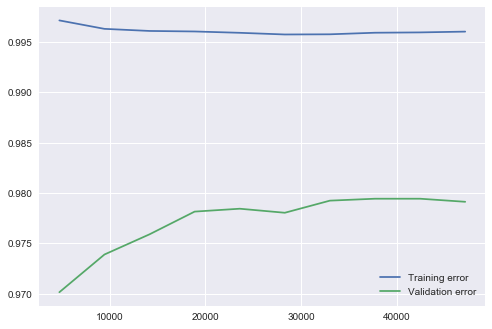

In [77]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.legend()
plt.show()

In [78]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9813839932860303

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 1438,   151],
       [   93, 11425]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1531
         1.0       0.99      0.99      0.99     11576

    accuracy                           0.98     13107
   macro avg       0.95      0.96      0.96     13107
weighted avg       0.98      0.98      0.98     13107



In [82]:
validation_x

,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4
38833,0.0,NaN,NaN,84.0,NaN,0.0,0.0,0.0,0.0
38834,77.0,NaN,0.0,NaN,94.0,29.0,44.0,0.0,4.0
38835,72.0,15.0,12.0,NaN,98.0,53.0,3.0,15.0,1.0
38836,72.0,28.0,62.0,NaN,93.0,55.0,14.0,2.0,1.0
40904,83.0,NaN,NaN,90.0,NaN,68.0,9.0,6.0,0.0
40905,87.0,NaN,60.0,NaN,84.0,73.0,7.0,1.0,6.0
40906,95.0,43.0,83.0,NaN,78.0,42.0,18.0,20.0,15.0
40907,97.0,48.0,73.0,NaN,83.0,58.0,4.0,11.0,24.0


In [83]:
validation_x=im.fit_transform(validation_x)
validation_x

array([[ 0.        , 33.5       , 48.33333333, 84.        , 88.33333333,
         0.        ,  0.        ,  0.        ,  0.        ],
       [77.        , 33.5       ,  0.        , 87.        , 94.        ,
        29.        , 44.        ,  0.        ,  4.        ],
       [72.        , 15.        , 12.        , 87.        , 98.        ,
        53.        ,  3.        , 15.        ,  1.        ],
       [72.        , 28.        , 62.        , 87.        , 93.        ,
        55.        , 14.        ,  2.        ,  1.        ],
       [83.        , 33.5       , 48.33333333, 90.        , 88.33333333,
        68.        ,  9.        ,  6.        ,  0.        ],
       [87.        , 33.5       , 60.        , 87.        , 84.        ,
        73.        ,  7.        ,  1.        ,  6.        ],
       [95.        , 43.        , 83.        , 87.        , 78.        ,
        42.        , 18.        , 20.        , 15.        ],
       [97.        , 48.        , 73.        , 87.        , 83

In [84]:
validation_x=ss.fit_transform(validation_x)

In [85]:
y_pred=dt.predict(validation_x)

In [86]:
validation_y

38833    0
38834    0
38835    0
38836    1
40904    1
40905    1
40906    1
40907    1
Name: Result, dtype: int64

In [87]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1])

In [88]:
accuracy_score(validation_y,y_pred)

1.0

In [139]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
svm=SVC(kernel='linear',C=1.0)
lr1=LogisticRegression(solver='liblinear',C=0.02)
dt1=DecisionTreeClassifier()
vc=VotingClassifier(estimators=[('lr',lr1),('dt',dt1),('svm',svm)])

In [140]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.02, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth...
                                        

In [141]:
y_pred=vc.predict(x_test)

In [142]:
accuracy_score(y_test,y_pred)

0.976424811169604

In [143]:
from sklearn.model_selection import validation_curve
train_sizes =np.linspace(0.1,1,10)
X=x_train
y=y_train
train_sizes, train_scores, valid_scores = learning_curve( vc, X, y, train_sizes=train_sizes, cv=10,scoring='f1')

In [108]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [144]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 4718     0.987081
9436     0.986812
14155    0.986923
18873    0.987014
23592    0.986745
28310    0.986632
33028    0.986615
37747    0.986678
42465    0.986887
47184    0.987120
dtype: float64

 --------------------

Mean validation scores

 4718     0.985127
9436     0.985552
14155    0.986321
18873    0.986299
23592    0.986475
28310    0.986443
33028    0.986294
37747    0.986422
42465    0.986558
47184    0.986662
dtype: float64


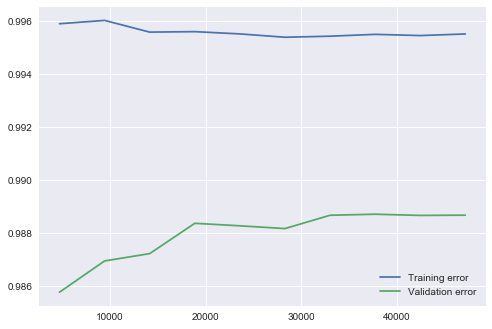

In [120]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.legend()
plt.show()

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

In [ ]:
classifier=Sequential()
# 1st Convolutional Layer
classifier.add(Dense(output_dim=8,init='uniform',input_dim=9,activation='relu'))
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=3,init='uniform',activation='relu'))

#output layer
classifier.add(Dense(output_dim=1,activation='sigmoid'))

classifier.summary()

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=classifier.fit(x_train,y_train,verbose=1,validation_split=0.1,nb_epoch=10)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
y_pred=(y_pred>0.5)
y_pred

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
history.history.keys()

### Plotting the graphs of Accuracy and Loss of ANN

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
predictions=classifier.predict(validation_x)
predictions=(predictions>0.5)

In [ ]:
print(accuracy_score(validation_y,predictions))

In [ ]:
cm=confusion_matrix(validation_y,predictions)
cm

In [ ]:
import pylab as pl
pl.matshow(cm)